ADAIX - 20-22 May 2018, Valencia - Spain

### Session II - Machine Learning in Practice: 
# Regression - II: Photometric redshift estimation 
by *[Emille E. O. Ishida](https://www.emilleishida.com/)*


In this example we are going to estimate photometric redshfits based on measurements of r-band magnitude and colours. 

## The Data

We shall work with an extract of the `Teddy` catalog presented in [Beck *et al.*, 2017](https://arxiv.org/abs/1701.08748).   
`Teddy` was build from SDSS-DR12 data release.  The complete catalog is composed of 4 samples with increasing levels of non-representativeness.  You can take a look in all the available samples in the [COINtoolbox](https://github.com/COINtoolbox/photoz_catalogues).

We begin by analysing `TeddyA`, a well behaved, high SNR sample.

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# read Teddy A
TeddyA = np.genfromtxt('TeddyA.csv',delimiter=',', names=True)
TeddyA_feat = np.vstack([TeddyA['mag_r'], TeddyA['ug'], TeddyA['gr'], TeddyA['ri'], TeddyA['iz']]).transpose()


# separate sample
# randomly separates 1/3 of the sample for testing
X_train, X_test, y_train, y_test = train_test_split(TeddyA_feat, 
                                                    TeddyA['z_spec'],test_size=0.33, random_state=42)


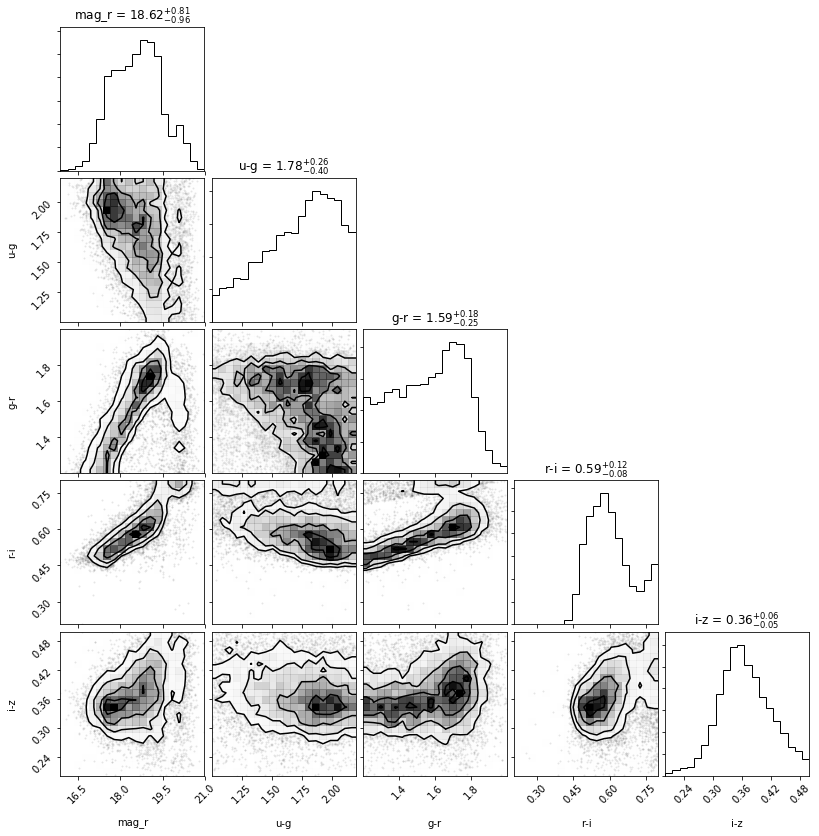

In [2]:
import pylab as plt
import corner

# plot every feature of the training sample against each other
figure = corner.corner(TeddyA_feat, labels=['mag_r', 'u-g', 'g-r', 'r-i', 'i-z'],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# train
regr.fit(X_train, y_train)

# estimate the photoz
zphoto_linear = regr.predict(X_test)

# quality of the fit
R2 = regr.score(X_test, y_test)

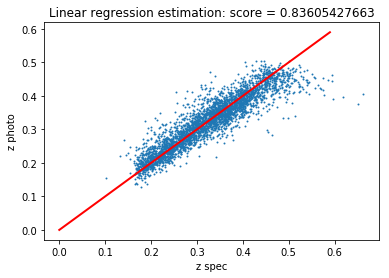

In [4]:
# Plot true vs estimated redshift
plt.figure()
plt.title('Linear regression estimation: score = ' + str(R2))
plt.scatter(y_test, zphoto_linear, s=0.9)
plt.plot(np.arange(0,0.6,0.01), np.arange(0,0.6,0.01), color='red', lw=2)
plt.xlabel('z spec')
plt.ylabel('z photo')
plt.show()

## Let's see how this behaves when faced with another learner

Suggestion: try for example, [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

In [6]:
# import something if necessary
from sklearn.ensemble import RandomForestRegressor

# Create an object
randfor = RandomForestRegressor()

# train
randfor.fit(X_train, y_train)

# estimate the photoz
zphoto_RF = randfor.predict(X_test)

# quality of the fit
randfor_score = randfor.score(X_test, y_test)

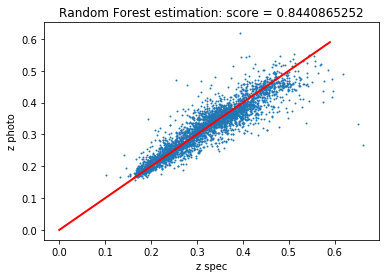

In [7]:
# Plot true vs estimated redshift
plt.figure()
plt.title('Random Forest estimation: score = ' + str(randfor_score))
plt.scatter(y_test, zphoto_RF, s=0.9)
plt.plot(np.arange(0,0.6,0.01), np.arange(0,0.6,0.01), color='red', lw=2)
plt.xlabel('z spec')
plt.ylabel('z photo')
plt.show()

Random Forests also allows you to calculate the relative feature importance:

In [8]:
randfor.feature_importances_

array([ 0.56594722,  0.02721745,  0.17955981,  0.19800996,  0.02926556])

### Question:
Given the illustrative description of Random Forests discussed earlier, can you describe how Random Forests can return feature importance?

<div class="question">

**Question:** All the above arguments are really simplistic and do not take into account the correlations in the data. In a more realistic scenario, feature extraction should be performed in a more criterious way. This will be further investigated in the supernova photmetric classification problem.

</div>

### Hyperparameters

Random Forest depends on a set of parameters. You can take a look on the options you used to get the results above with:

In [47]:
randfor.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

The algorithm is specially sensitive to the `max_depth`, or how far away you wish to allow your branches to reach.  
<div class="alert alert-success">
Changing by hand the `max_depth` in the example above, how does your results change?  
The deeper the better or can you spot a change in behaviour at some point?
</div>

Points for latter discussion:
    * we should optimize the hyperparameters using cross validation
    * using proper data is sometimes as important as choosing a proper model. 

In the `data` folder, you will find extracts from the other samples of `Teddy`. 
Use the models you already trained here and try to estimate the output from other samples (B, C and D).

**Do you see a difference in your results among different samples?**

**Exploring these samples, can you guess why results are different?**

For detailed explanation about `Teddy`, see [Beck *et al.*, 2017](https://arxiv.org/abs/1701.08748).

------------------------------------------------------------------------------------------------------------------
Summary:

## Machine Learning Model    

**Task**:  Estimate photometric redshift based on measurements of magnitudes and colours.  

       input: r-band magnitude and 4 different colours in SDSS broad-band filters
       output: estimated photometric redshifts=
       
**Task Category**:   Regression

**Data**: Extract from `Teddy` catalog from [Beck *et al*., 2017](https://arxiv.org/abs/1701.08748)  
        
        5 Features, x 
            mag_r       magnitude in SDSS r-band
              u-g       u - g colour in SDSS system
              g-r       g - r colour in SDSS system
              r-i       r - i colour in SDSS system
              i-z       i - z colour in SDSS system
              
    
        1 response variable (label), y    
            redshift
            
**Machine Learning category**:  

        Supervised Learning

**Set of possible samples**:  

        10000 galaxies
        
**Set of possible labels**:

        positive real numbers (aditional constraints are observational)
        
**Learner**:
    
        1 - Linear Regression     
        2 - Random Forest
        3 - ...
        
**Loss function**:

        1 - Sum of squared residuals (Ordinary Least Square)
        2 - Mean squared error (MSE) 